# Logistic Regression

### Use cases
#### email spam or not, will customer buy or not, to which party the person will
#### cast vote. Prediction value is categorical. classification problem

In [2]:
# sigmoid or logit function is used
# sigmoid(z) = 1/(1+e^-z)
# it converts input range into 0 to 1 range
# z is replaced with m*x+b which is linear regression equation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('insurance_data.csv')

In [5]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


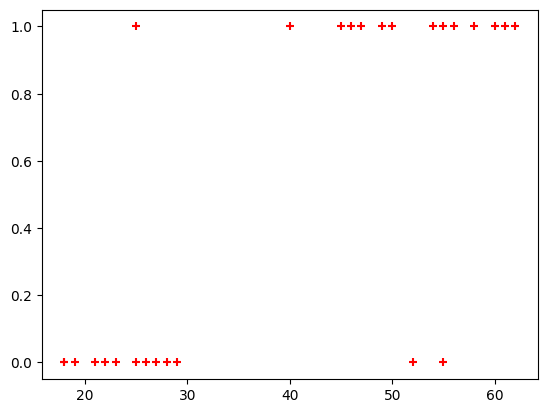

In [6]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color = "red")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df['bought_insurance'],test_size=0.1)

In [9]:
len(x_train)

24

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
model.predict(x_test)

array([1, 1, 1], dtype=int64)

In [14]:
model.score(x_test,y_test)

1.0

In [15]:
model.predict_proba(x_test) # to get probability

array([[0.29809481, 0.70190519],
       [0.22561024, 0.77438976],
       [0.0606092 , 0.9393908 ]])

# Exercise

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("HR_comma_sep.csv")

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
df.shape

(14999, 10)

In [20]:
left_persons = df[df['left']==1]
left_persons.shape

(3571, 10)

In [21]:
retained = df[df['left']==0]
retained.shape

(11428, 10)

In [22]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

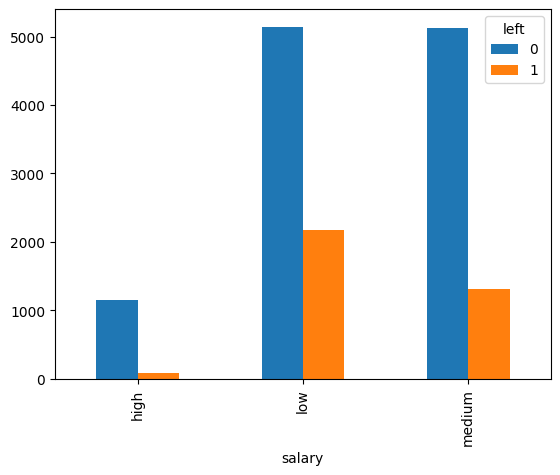

In [23]:
pd.crosstab(df['salary'],df['left']).plot(kind="bar")
# plt.bar(df['salary'],df['left'])

<Axes: xlabel='Department'>

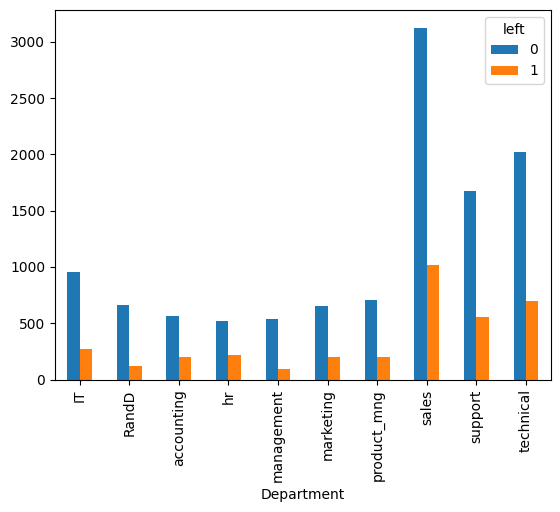

In [24]:
pd.crosstab(df['Department'],df['left']).plot(kind="bar")

In [25]:
df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [101]:
dummy_vars = pd.get_dummies(df['salary'],prefix="salary")
dummy_vars

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [102]:
df = pd.concat([df,dummy_vars],axis="columns")
df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,False,True,False
1,0.80,262,0,medium,1,False,False,True
2,0.11,272,0,medium,1,False,False,True
3,0.72,223,0,low,1,False,True,False
4,0.37,159,0,low,1,False,True,False
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,False,True,False
14995,0.37,160,0,low,1,False,True,False
14996,0.37,143,0,low,1,False,True,False
14997,0.11,280,0,low,1,False,True,False


In [103]:
df=df.drop(['salary'],axis="columns")
df

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,False,True,False
1,0.80,262,0,1,False,False,True
2,0.11,272,0,1,False,False,True
3,0.72,223,0,1,False,True,False
4,0.37,159,0,1,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,1,False,True,False
14995,0.37,160,0,1,False,True,False
14996,0.37,143,0,1,False,True,False
14997,0.11,280,0,1,False,True,False


In [123]:
y = df['left']
x = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']]

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [126]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [127]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [128]:
model.score(x_test,y_test)

0.7717777777777778

# Multiclass Classification

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

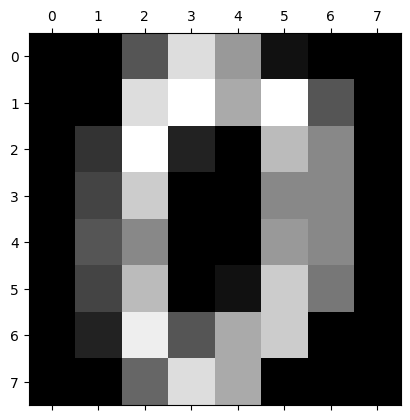

In [4]:
plt.gray()
plt.matshow(digits.images[0])

In [5]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(x_train,y_train)

C:\Users\ashis\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
model.score(x_test,y_test)

0.9666666666666667

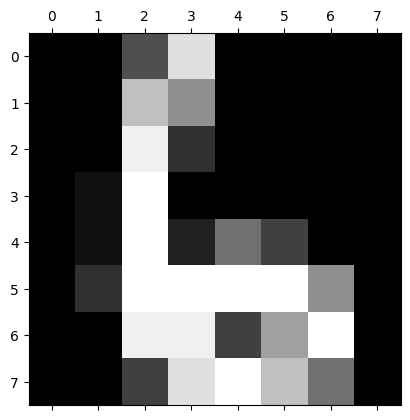

In [11]:
plt.matshow(digits.images[67])

In [12]:
model.predict([digits.data[67]])

array([6])

In [13]:
# to get accuracy of the model where it fails
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 41,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

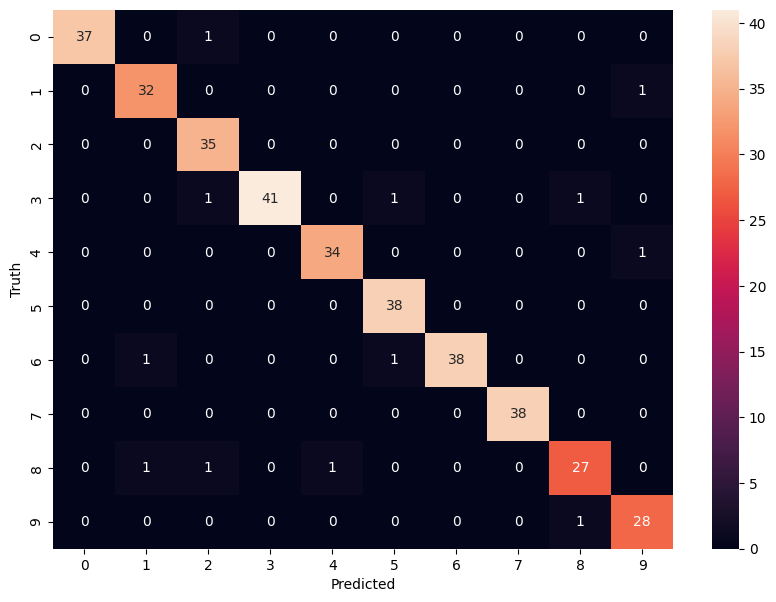

In [15]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
# 37 times the truth was 0 and model predicted 0
# 1 time the truth was 8 but model predicted 1

# Exercise

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [43]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [44]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2)

In [47]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\ashis\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_predicted = model.predict(x_test)

In [54]:
model.score(x_test,y_test)

0.9666666666666667

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

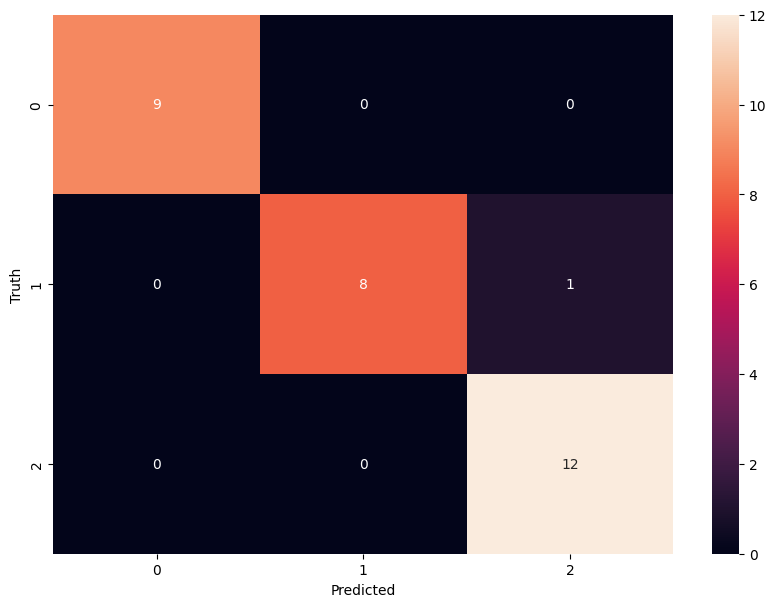

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')